**Parcours Ingénieur Machine Learning**<br>
**Plus d'informations** : https://openclassrooms.com/fr/paths/148-ingenieur-machine-learning <br>

**Auteur** : Viktoriya Zeruk<br>
**Date dernière version** : 18/08/2022<br>
**Accès projet git** : https://github.com/viczer/P8-Openclassroom_competition_Kaggle <br>
**Lien kernel Kaggle** : https://www.kaggle.com/code/victoriazeruk/amex-choise-model?scriptVersionId=103625672

---


<div style="display: flex; background: rgb(75,0,130);
background: linear-gradient(90deg, rgba(75,0,130,1) 47%, rgba(216,191,216,1) 89%, rgba(230,230,250,1) 100%);">
<h2 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center">Project 8 : Participez a une competition Kaggle !
 </br>  | Notebook 1 : Model Choice | <br></h2> </div>    

<div style="display: flex; background: rgb(75,0,130);
background: linear-gradient(90deg, rgba(75,0,130,1) 47%, rgba(216,191,216,1) 89%, rgba(230,230,250,1) 100%);">
<h4 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center"> </h4> 
</div>   

<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#7c7c7c;overflow:hidden;font-weight:500">American Express Default Prediction<br> | Predict if a customer will default in the future |</div>

# <b><span style='color:#4B4B4B'>(1) </span><span style='color:#7c7c7c'> Competition Overview</span></b>
Whether out at a restaurant or buying tickets to a concert, modern life counts on the convenience of a credit card to make daily purchases. It saves us from carrying large amounts of cash and also can advance a full purchase that can be paid over time. How do card issuers know we'll pay back what we charge? That's a complex problem with many existing solutions—and even more potential improvements, to be explored in this competition.

Credit default prediction is central to managing risk in a consumer lending business. Credit default prediction allows lenders to optimize lending decisions, which leads to a better customer experience and sound business economics. Current models exist to help manage risk. But it's possible to create better models that can outperform those currently in use.

American Express is a globally integrated payments company. The largest payment card issuer in the world, they provide customers with access to products, insights, and experiences that enrich lives and build business success.

The objective of [this competition](https://www.kaggle.com/competitions/amex-default-prediction) is to predict the probability that a customer does not pay back their credit card balance amount in the future based on their monthly customer profile. In this competition, you'll apply your machine learning skills to predict credit default. Specifically, you will leverage an industrial scale data set to build a machine learning model that challenges the current model in production. Training, validation, and testing datasets include time-series behavioral data and anonymized customer profile information. You're free to explore any technique to create the most powerful model, from creating features to using the data in a more organic way within a model.

If successful, you'll help create a better customer experience for cardholders by making it easier to be approved for a credit card. Top solutions could challenge the credit default prediction model used by the world's largest payment card issuer—earning you cash prizes, the opportunity to interview with American Express, and potentially a rewarding new career.

# <b><span style='color:#4B4B4B'>(2) </span><span style='color:#7c7c7c'> Data Overview</span></b>
The target binary variable is calculated by observing 18 months performance window after the latest credit card statement, and if the customer does not pay due amount in 120 days after their latest statement date it is considered a default event.

The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories:  
**`D_*`:** Delinquency variables  
**`S_*`:** Spend variables  
**`P_*`:** Payment variables  
**`B_*`:** Balance variables  
**`R_*`:** Risk variables  
With the following features being categorical: `B_30`, `B_38`, `D_63`, `D_64`, `D_66`, `D_68`, `D_114`, `D_116`, `D_117`, `D_120`, `D_126`. 

Your task is to predict, for each customer_ID, the probability of a future payment default (target = 1).<br>
Note that the negative class has been subsampled for this dataset at 5%, and thus receives a 20x weighting in the scoring metric

- `train_data.csv` - training data with multiple statement dates per customer_ID
- `train_labels.csv` - target label for each customer_ID
- `test_data.csv` - corresponding test data; your objective is to predict the target label for each customer_ID
- `sample_submission.csv` - a sample submission file in the correct formatbr<br>

# <b><span style='color:#4B4B4B'>(3) </span><span style='color:#7c7c7c'> Objective</span></b>
The objective of this competition is to predict the probability that a customer does not pay back their credit card balance amount in the future based on their monthly customer profile. The target binary variable is calculated by observing 18 months performance window after the latest credit card statement, and if the customer does not pay due amount in 120 days after their latest statement date it is considered a default event.
# <b><span style='color:#4B4B4B'>(4)</span><span style='color:#7c7c7c'> Evaluation</span></b>
The evaluation metric, M , for this competition is the mean of two measures of rank ordering: Normalized Gini Coefficient,G, and default rate captured at 4%,D.

M = 0.5(G + D)

The default rate captured at 4% is the percentage of the positive labels (defaults) captured within the highest-ranked 4% of the predictions, and represents a Sensitivity/Recall statistic.

For both of the sub-metrics G and D, the negative labels are given a weight of 20 to adjust for downsampling.

This metric has a maximum value of 1.0.

# <b><span style='color:#4B4B4B'> </span><span style='color:#7c7c7c'> References</span></b>

- AMEX : Credit Score Model 💳: https://www.kaggle.com/code/gopidurgaprasad/amex-credit-score-model/notebook



# <a name="p1"><b><div style='padding:15px;background-color:#4B4B4B;color:white;border-radius:5px;font-size:100%'>1. Imports & Data Loading</div></b> </a>

In [1]:
!pip -q install optbinning

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.colors
import missingno as mso
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode

#import random
#import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import timeit
import pickle
import optbinning

from tqdm import tqdm
from itertools import cycle

from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from lightgbm import LGBMClassifier, early_stopping, log_evaluation 
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import roc_auc_score, roc_curve, auc

import warnings, gc
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), 
                           height=500, width=1000))

pd.set_option('display.max_columns', 100)

In [3]:
%%time
train_ = pd.read_feather('../input/amex-default-prediction-feather/train.feather')
test_ = pd.read_feather('../input/amex-default-prediction-feather/test.feather')
train_labels = pd.read_csv("../input/amex-default-prediction/train_labels.csv")
categorical_var = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68', 'S_2']

CPU times: user 41.4 s, sys: 26.7 s, total: 1min 8s
Wall time: 57.9 s


In [4]:
print("Train data AMEX-Default Prediction: Feather Dataset shape:", train_.shape)
print("Test data AMEX-Default Prediction: Feather Dataset shape:", test_.shape)
print("Train lablels shape:", train_labels.shape)

Train data AMEX-Default Prediction: Feather Dataset shape: (5531451, 190)
Test data AMEX-Default Prediction: Feather Dataset shape: (11363762, 190)
Train lablels shape: (458913, 2)


In [5]:
# --- Reading Dataset ---
train_.head(3).style.background_gradient(cmap='Purples')

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,nan,nan,0.000630,0.080994,0.708984,0.170654,0.006203,0.358643,0.525391,0.255615,nan,0.063904,0.059418,0.006466,0.148682,1.335938,0.008209,0.001423,0.207275,0.736328,0.096191,nan,0.023376,0.002768,0.008324,1.001953,0.008301,0.161377,0.148315,0.922852,0.354492,0.151978,0.118103,0.001882,0.158569,0.065735,0.018387,0.063660,0.199585,0.308350,0.016357,0.401611,0.091064,0,1,0.007126,0.007664,nan,0.652832,0.008522,-1,0.004730,6,0.271973,0.008362,0.515137,0.002644,0.009010,0.004807,0.008339,0.119385,0.004803,0.108276,0.050873,nan,0.007553,0.080444,0.069092,nan,0.004326,0.007561,nan,0.007729,0.000272,0.001575,0.004238,0.001434,nan,0.002272,0.004059,0.007122,0.002457,0.002310,0.003532,0.506836,0.008034,1.009766,0.084656,0.003820,0.007042,0.000438,0.006451,0.000830,0.005054,nan,0,0.005722,0.007084,nan,0.000198,0.008911,nan,1.000000,0.002537,0.005177,0.006626,0.009705,0.007782,0.002449,1.000977,0.002665,0.007481,0.006893,1.503906,1.005859,0.003569,0.008873,0.003948,0.003647,0.004951,0.894043,0.135620,0.911133,0.974609,0.001244,0.766602,1.008789,1.004883,0.893555,nan,0.669922,0.009972,0.004570,nan,1.008789,2,nan,0.004326,nan,nan,nan,1.007812,0.210083,0.676758,0.007874,1,0.238281,0,4,0.232178,0.236206,0,0.702148,0.434326,0.003057,0.686523,0.008743,1,1.002930,1.007812,1.000000,0.006805,nan,0.002052,0.005970,nan,0.004345,0.001534,nan,nan,nan,nan,nan,0.002426,0.003706,0.003819,nan,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,nan,nan,0.002525,0.069397,0.712891,0.113220,0.006207,0.353516,0.521484,0.223389,nan,0.065247,0.057739,0.001614,0.149780,1.339844,0.008369,0.001984,0.202759,0.720703,0.099792,nan,0.030594,0.002748,0.002481,1.008789,0.005135,0.140991,0.143555,0.919434,0.326660,0.156250,0.118713,0.001610,0.148438,0.093933,0.013039,0.065491,0.151367,0.265137,0.017685,0.406250,0.086792,0,1,0.002413,0.007149,nan,0.646973,0.002237,-1,0.003880,6,0.188965,0.004028,0.509277,0.004192,0.007843,0.001283,0.006523,0.140625,0.000094,0.101013,0.040466,nan,0.004833,0.081421,0.074158,nan,0.004204,0.005302,nan,0.001864,0.000978,0.009895,0.007599,0.000509,nan,0.009811,0.000126,0.005966,0.000395,0.001327,0.007774,0.500977,0.000761,1.009766,0.081848,0.000347,0.007790,0.004311,0.002333,0.009468,0.003754,nan,0,0.007584,0.006676,nan,0.001143,0.005905,nan,1.000000,0.008430,0.008980,0.001854,0.009926,0.005989,0.002247,1.006836,0.002508,0.006828,0.002836,1.503906,1.005859,0.000571,0.000391,0.008354,0.008850,0.003180,0.902344,0.136353,0.919922,0.975586,0.004562,0.786133,1.000000,1.003906,0.906738,nan,0.668457,0.003922,0.004654,nan,1.002930,2,nan,0.008705,nan,nan,nan,1.007812,0.184082,0.822266,0.003445,1,0.247192,0,4,0.243530,0.241943,0,0.707031,0.430420,0.001306,0.686523,0.000755,1,1.008789,1.003906,1.008789,0.004406,nan,0.001034,0.00483

# <a name="p2"><b><div style='padding:15px;background-color:#4B4B4B;color:white;border-radius:5px;font-size:100%'>2. Train  data set exploration</div></b> </a>

## <b><div style='padding:10px;background-color:#7c7c7c;color:white;border-radius:5px;font-size:100%'>2.1 Train Labels data set exploration</div></b> 

In [6]:
# --- Reading Dataset ---
train_labels.head().style.background_gradient(cmap='Purples').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

customer_ID,target
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0


In [7]:
## Data Type
print('\033[1m'"Data types of each column in train label data file\n"'\033[0m',train_labels.dtypes)

Data types of each column in train label data file
 customer_ID    object
target          int64
dtype: object


In [8]:
# Check for the duplicated values 

print('\033[1m'"Duplicate value present in each column of train label data file\n"'\033[0m',train_labels.customer_ID.duplicated().any())

Duplicate value present in each column of train label data file
 False


In [9]:
# No of unique customers 

print('\033[1m'"No of Unique customers in the  train label data file\n"'\033[0m',train_labels.customer_ID.nunique())

No of Unique customers in the  train label data file
 458913


In [10]:
# Count of the Target

print('\033[1m'"Value count of the target column in the train label data file\n"'\033[0m',train_labels.target.value_counts())

Value count of the target column in the train label data file
 0    340085
1    118828
Name: target, dtype: int64


## <b><div style='padding:10px;background-color:#7c7c7c;color:white;border-radius:5px;font-size:100%'>2.2 Missing values</div></b> 

In [11]:
def quantity_missing_values(data):
    """function to obtain the number and percentage of missing values for each variable of a dataframe, 
    in descending order"""
    
    values = data.isnull().sum()
    percentage = 100 * values / len(data)
    table = pd.concat([values, percentage.round(2)], axis=1)
    table.columns = ['Number of missing values', '% of missing values']
    
    return table[table['Number of missing values'] != 0].sort_values('% of missing values', ascending = False).style.background_gradient('Purples')

In [12]:
quantity_missing_values(train_)

,Number of missing values,% of missing values
D_87,5527586,99.930000
D_88,5525447,99.890000
D_108,5502513,99.480000
D_110,5500117,99.430000
D_111,5500117,99.430000
B_39,5497819,99.390000
D_73,5475595,98.990000
B_42,5459973,98.710000
D_135,5336752,96.480000
D_138,5336752,96.480000


It appears that for some variables, a lot of data is missing. But it should be kept in mind that cases of fraud or non-payment are quite rare, hence a high number of missing values. We will consider that the dataset does not contain any errors and keep the missing values for the moment.



## <b><div style='padding:10px;background-color:#7c7c7c;color:white;border-radius:5px;font-size:100%'>2.3 Customers</div></b> 

Let's now have a look at the number of customers and how many times they appear in the dataset.

In [13]:
nb_customers = len(list(train_['customer_ID'].unique()))
print("Number of customers:", nb_customers)

Number of customers: 458913


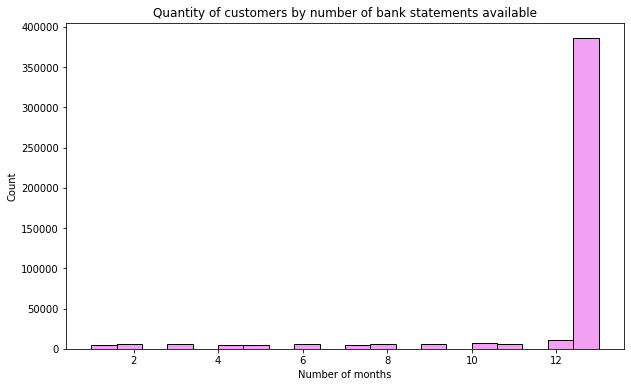

In [14]:
y = train_.groupby("customer_ID")['customer_ID'].count().values

plt.figure(figsize=(10, 6))
sns.histplot(data=y, color='#EE82EE')
plt.xlabel('Number of months')
plt.title('Quantity of customers by number of bank statements available')
plt.show()

For most customers, we have the bank statements of the last 13 months.</br>
Let's now have a look at the quantity of customers with default payment.

In [15]:
# connection between the number of bank statements and the target output
df = train_.groupby("customer_ID")['customer_ID'].count()
df = pd.DataFrame({"customer_ID":df.index, "count": df.values})
# merge the data with the label data frame
df = df.merge(train_labels, on='customer_ID', how='left')

df.head()

,customer_ID,count,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,13,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,13,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,13,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,13,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,13,0


A quarter of customers did not pay back their credit card balance amount.

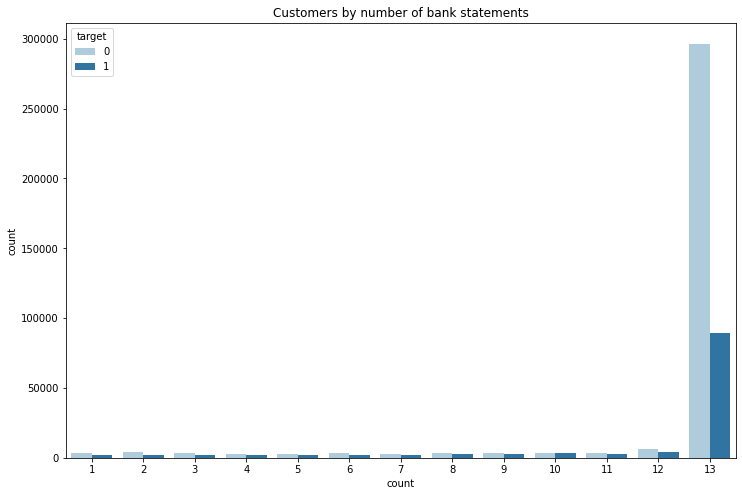

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='count',hue='target', palette='Paired')
plt.title('Customers by number of bank statements')
plt.show()

# <a name="p3"><b><div style='padding:15px;background-color:#4B4B4B;color:white;border-radius:5px;font-size:100%'>3. Information value analysis</div></b> </a>

In [17]:
# Training data preparation
# taking latest profile features for each customer

train_df = train_.groupby("customer_ID").tail(1).reset_index(drop=True)
test_df = test_.groupby("customer_ID").tail(1).reset_index(drop=True)

In [18]:
# Merge with targets
train_df = train_df.merge(train_labels, on='customer_ID', how='left')

In [19]:
target_col = 'target'
drop_cols = ['customer_ID', 'S_2', target_col]
cat_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
train_cols = [col for col in train_df.columns if col not in drop_cols]

### **Information Value (IV)**


Information value is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance.

<blockquote class="tr_bq">
IV = ∑ (% of non-events - % of events) * WOE</blockquote>

If the IV statistic is:
- Less than 0.02, then the predictor is not useful for modeling (separating the Goods from the Bads)
- 0.02 to 0.1, then the predictor has only a weak relationship to the Goods/Bads odds ratio
- 0.1 to 0.3, then the predictor has a medium strength relationship to the Goods/Bads odds ratio
- 0.3 to 0.5, then the predictor has a strong relationship to the Goods/Bads odds ratio.
- > 0.5, suspicious relationship (Check once)


Reference: https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

- for selecting features we are calculating IV values for each feature
- thankfully `optbinning` will do for us :) 

In [20]:
iv_score_dict = {}
for col in tqdm(train_cols):
    if col in cat_cols:
        optb = optbinning.OptimalBinning(dtype='categorical')
        optb.fit(train_df[col], train_df['target'])
    else:
        optb = optbinning.OptimalBinning(dtype='numerical')
        optb.fit(train_df[col], train_df['target'])
    binning_table = optb.binning_table
    binning_table.build()
    iv_score_dict[col] = binning_table.iv

iv_score_df = pd.Series(iv_score_dict)
iv_score_df.sort_values(ascending=False, inplace=True)

100%|██████████| 188/188 [03:07<00:00,  1.00it/s]


In [21]:
# top 10 imp iv features
iv_score_df.head(15)

P_2     3.732496
D_48    2.406650
B_18    2.212995
B_7     2.106675
D_75    2.070369
D_61    2.070309
B_23    2.059052
B_10    1.998735
B_9     1.994288
D_44    1.980849
B_2     1.905190
B_6     1.900564
B_3     1.858991
B_1     1.829305
B_37    1.801300
dtype: float64

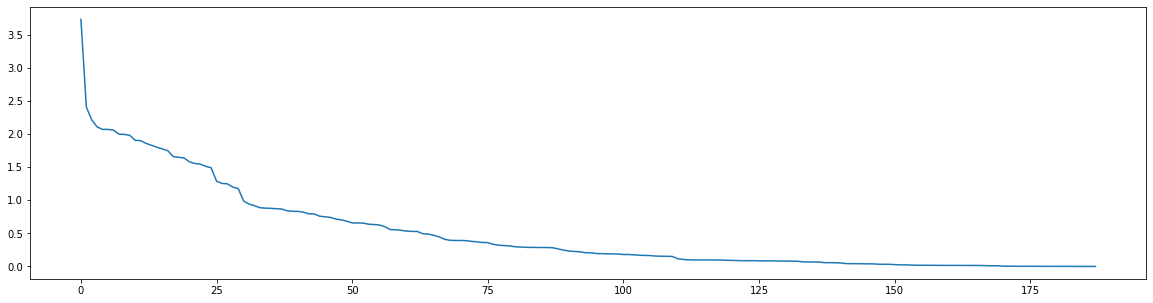

In [22]:
# iv score vs features
fig, ax = plt.subplots(figsize=(20,5))
iv_score_df.reset_index(drop=True).plot()
plt.show()

### **Weight of Evidence (WOE)**

The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan.
<blockquote class="tr_bq">
WOE = In(% of non-events ➗ % of events)</blockquote>

- Distribution of Goods - % of Good Customers in a particular group
- Distribution of Bads - % of Bad Customers in a particular group
- ln - Natural Log

**Steps of Calculating WOE**

1. For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
2. Calculate the number of events and non-events in each group (bin)
3. Calculate the % of events and % of non-events in each group.
4. Calculate WOE by taking natural log of division of % of non-events and % of events

- woe values and woe plot

In [23]:
col = 'P_2'
optb = optbinning.OptimalBinning(dtype='numerical')
optb.fit(train_df[col], train_df['target'])
binning_table = optb.binning_table
display(binning_table.build())

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.18)",29733,0.064790,2631,27102,0.911512,-3.383762,0.745582,0.064705
1,"[0.18, 0.32)",34240,0.074611,8586,25654,0.749241,-2.146085,0.409141,0.043147
2,"[0.32, 0.43)",40102,0.087385,15556,24546,0.612089,-1.507621,0.242465,0.027729
3,"[0.43, 0.52)",41474,0.090374,22460,19014,0.458456,-0.884958,0.083160,0.010069
4,"[0.52, 0.58)",28361,0.061800,19500,8861,0.312436,-0.262764,0.004528,0.000564
5,"[0.58, 0.64)",32780,0.071430,26363,6417,0.195760,0.361492,0.008501,0.001057
6,"[0.64, 0.69)",22969,0.050051,20396,2573,0.112021,1.018748,0.039039,0.004679
7,"[0.69, 0.73)",23797,0.051855,22171,1626,0.068328,1.561144,0.080413,0.009141
8,"[0.73, 0.77)",24883,0.054222,23932,951,0.038219,2.173939,0.135583,0.014242
9,"[0.77, 0.82)",33368,0.072711,32634,734,0.021997,2.743082,0.246278,0.023740


- `P_2` is a continuous feature, os we splited into 15 bins 
- each bin have non-event and event counts and rates
- each bin have WOE and IV values 
- for missing values it's created 16th bin

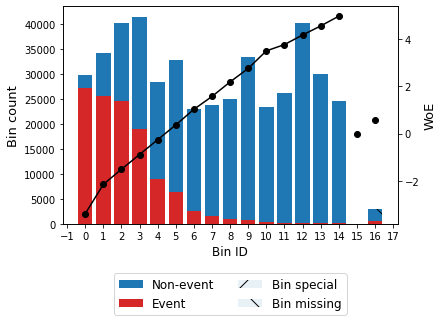

None

In [24]:
display(binning_table.plot(metric="woe"))

- from this woe plot we can observe that while increasing bins the event rate decrease
- you can observe that black doted line that is positively correlated with target

----------------------------------------------------------------------------------------------------
################ Feature Name :  P_2





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.18)",29733,0.064790,2631,27102,0.911512,-3.383762,0.745582,0.064705
1,"[0.18, 0.32)",34240,0.074611,8586,25654,0.749241,-2.146085,0.409141,0.043147
2,"[0.32, 0.43)",40102,0.087385,15556,24546,0.612089,-1.507621,0.242465,0.027729
3,"[0.43, 0.52)",41474,0.090374,22460,19014,0.458456,-0.884958,0.083160,0.010069
4,"[0.52, 0.58)",28361,0.061800,19500,8861,0.312436,-0.262764,0.004528,0.000564
5,"[0.58, 0.64)",32780,0.071430,26363,6417,0.195760,0.361492,0.008501,0.001057
6,"[0.64, 0.69)",22969,0.050051,20396,2573,0.112021,1.018748,0.039039,0.004679
7,"[0.69, 0.73)",23797,0.051855,22171,1626,0.068328,1.561144,0.080413,0.009141
8,"[0.73, 0.77)",24883,0.054222,23932,951,0.038219,2.173939,0.135583,0.014242
9,"[0.77, 0.82)",33368,0.072711,32634,734,0.021997,2.743082,0.246278,0.023740


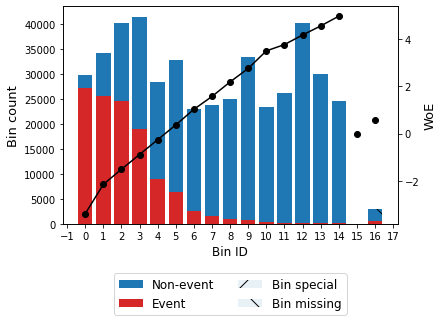

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  D_48





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.03)",40321,0.087862,39743,578,0.014335,3.179097,0.356052,0.031973
1,"[0.03, 0.06)",39897,0.086938,39192,705,0.017671,2.966512,0.324266,0.030154
2,"[0.06, 0.11)",35920,0.078272,35007,913,0.025418,2.595049,0.247185,0.024387
3,"[0.11, 0.17)",36804,0.080198,35137,1667,0.045294,1.996711,0.178286,0.019193
4,"[0.17, 0.28)",38150,0.083131,34542,3608,0.094574,1.207504,0.085981,0.010139
5,"[0.28, 0.44)",40485,0.088219,32488,7997,0.197530,0.350286,0.009889,0.001230
6,"[0.44, 0.54)",23908,0.052097,16308,7600,0.317885,-0.288011,0.004610,0.000574
7,"[0.54, 0.69)",35396,0.077130,20192,15204,0.429540,-0.767791,0.052652,0.006424
8,"[0.69, 0.83)",35742,0.077884,15754,19988,0.559230,-1.289556,0.157179,0.018390
9,"[0.83, 0.90)",24701,0.053825,8613,16088,0.651310,-1.676319,0.184501,0.020693


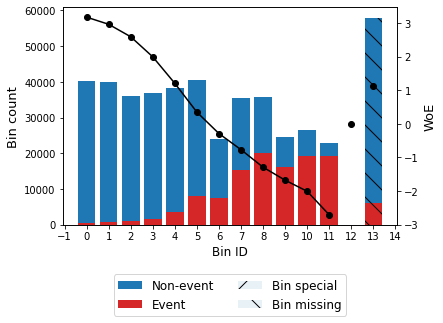

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  B_18





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.07)",35752,0.077906,13231,22521,0.629923,-1.583404,0.238494,0.027042
1,"[0.07, 0.19)",72687,0.158389,28920,43767,0.602130,-1.465865,0.415257,0.047708
2,"[0.19, 0.24)",40086,0.087350,18863,21223,0.529437,-1.169402,0.143997,0.017039
3,"[0.24, 0.33)",22950,0.050009,13625,9325,0.406318,-0.672311,0.025824,0.003169
4,"[0.33, 0.52)",27248,0.059375,20413,6835,0.250844,0.042597,0.000107,0.000013
5,"[0.52, 0.59)",33896,0.073861,28545,5351,0.157865,0.62268,0.024224,0.002980
6,"[0.59, 0.68)",33874,0.073814,30032,3842,0.113420,1.004752,0.056241,0.006749
7,"[0.68, 0.85)",28275,0.061613,25745,2530,0.089478,1.268503,0.069020,0.008092
8,"[0.85, 1.00)",24355,0.053071,23831,524,0.021515,2.765732,0.181609,0.017443
9,"[1.00, 1.00)",31722,0.069124,31045,677,0.021342,2.774003,0.237423,0.022774


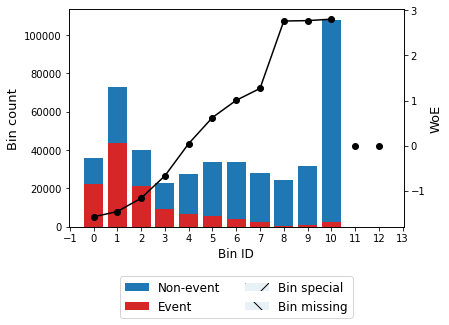

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  B_7





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.03)",117350,0.255713,114931,2419,0.020614,2.809459,0.892258,0.085104
1,"[0.03, 0.03)",24135,0.052592,23564,571,0.023659,2.668568,0.172078,0.016783
2,"[0.03, 0.04)",24001,0.052300,23084,917,0.038207,2.174269,0.130804,0.013740
3,"[0.04, 0.07)",45010,0.098080,41383,3627,0.080582,1.382946,0.126071,0.014612
4,"[0.07, 0.09)",26687,0.058153,22462,4225,0.158317,0.619287,0.018884,0.002323
5,"[0.09, 0.13)",27189,0.059247,20545,6644,0.244364,0.077385,0.000348,0.000044
6,"[0.13, 0.21)",41023,0.089392,27006,14017,0.341686,-0.39573,0.015256,0.001895
7,"[0.21, 0.26)",23421,0.051036,13302,10119,0.432048,-0.778019,0.035822,0.004368
8,"[0.26, 0.35)",29823,0.064986,15239,14584,0.489019,-1.007586,0.078514,0.009419
9,"[0.35, 0.48)",33304,0.072571,14966,18338,0.550625,-1.254713,0.138416,0.016250


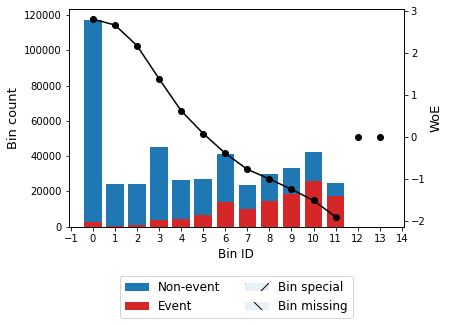

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  D_75





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.00)",33661,0.073349,32897,764,0.022697,2.71105,0.244814,0.023718
1,"[0.00, 0.01)",106859,0.232852,104341,2518,0.023564,2.672681,0.763367,0.074405
2,"[0.01, 0.04)",23965,0.052221,23351,614,0.025621,2.586882,0.164254,0.016226
3,"[0.04, 0.10)",73379,0.159897,64317,9062,0.123496,0.908216,0.102500,0.012390
4,"[0.10, 0.17)",49885,0.108703,36813,13072,0.262043,-0.01614,0.000028,0.000004
5,"[0.17, 0.24)",38977,0.084933,24206,14771,0.378967,-0.557584,0.029624,0.003656
6,"[0.24, 0.33)",31048,0.067656,16630,14418,0.464378,-0.908788,0.065828,0.007957
7,"[0.33, 0.34)",23753,0.051759,11147,12606,0.530712,-1.174521,0.086103,0.010184
8,"[0.34, 0.60)",44191,0.096295,16939,27252,0.616687,-1.527027,0.274150,0.031285
9,"[0.60, inf)",33195,0.072334,9444,23751,0.715499,-1.973764,0.339700,0.036684


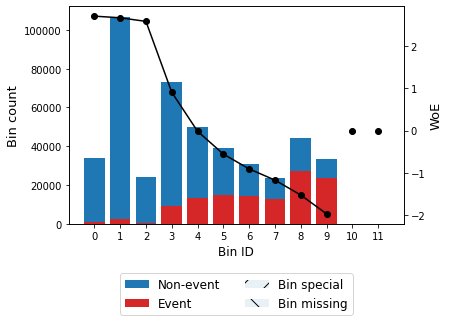

None

In [25]:
# WOE plots for top 5 features
top10_features = iv_score_df[:5].index.values

for col in top10_features:
    print("-"*100)
    print("="*100)
    print("################ Feature Name : ", col)
    print("\n\n")

    if col in cat_cols:
        optb = optbinning.OptimalBinning(dtype='categorical')
        optb.fit(train_df[col], train_df['target'])
    else:
        optb = optbinning.OptimalBinning(dtype='numerical')
        optb.fit(train_df[col], train_df['target'])

    binning_table = optb.binning_table
    display(binning_table.build())
    display(binning_table.plot(metric="woe"))

In [26]:
selected_features = iv_score_df[iv_score_df > 0.5].index.values
cat_cols = [col for col in cat_cols if col in selected_features]
train_cols = [col for col in train_df.columns if col in selected_features]

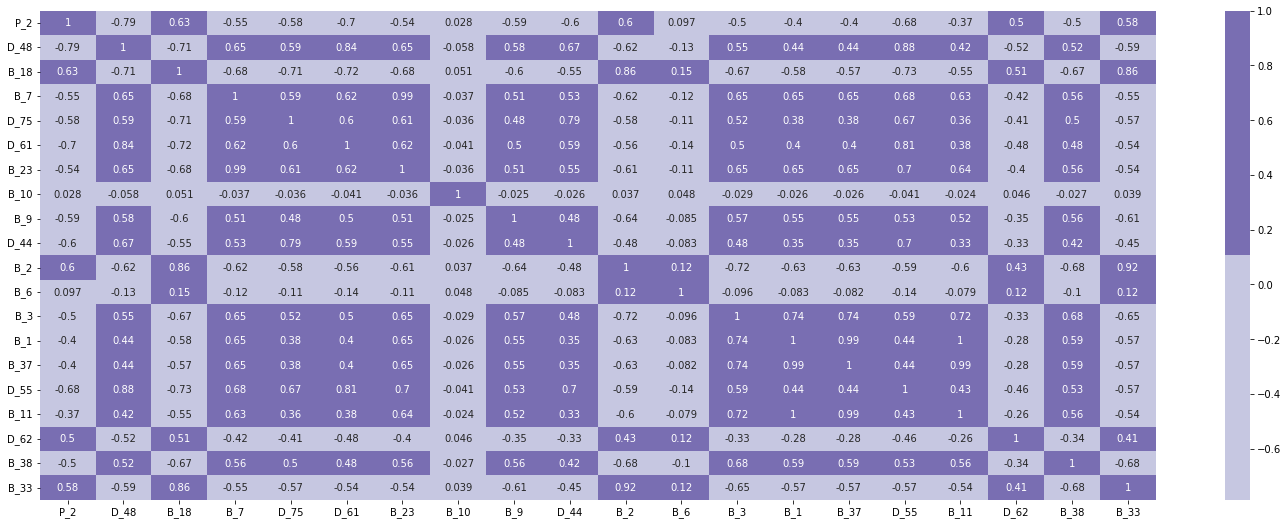

In [27]:
top_cols = [col for col in selected_features[:20] if col in train_cols]
corr_df = train_df[top_cols].corr()
plt.figure(figsize=(25, 9))
sns.heatmap(corr_df,annot=True ,cmap=sns.color_palette("Purples",2));
plt.show()

In [28]:
def drop_feature_selection(row, col, corr, row_iv, col_iv):
    if row_iv >= col_iv:
        return col
    else:
        return row

In [29]:
cor_matrix = train_df[train_cols].corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
corr_df = upper_tri.stack().reset_index()
corr_df.columns = ['row', 'col', 'corr']
corr_df = corr_df.drop_duplicates()
corr_df = corr_df.sort_values('corr', ascending=False)
corr_df = corr_df.query("corr >= 0.8")
corr_df['row_iv'] = corr_df['row'].map(iv_score_dict)
corr_df['col_iv'] = corr_df['col'].map(iv_score_dict)

corr_df['drop_feature'] = corr_df.apply(lambda x: drop_feature_selection(x['row'], x['col'], x['corr'], x['row_iv'], x['col_iv']), axis=1)

In [30]:
corr_df.style.background_gradient(cmap='Purples')

,row,col,corr,row_iv,col_iv,drop_feature
1531,D_62,D_77,0.999824,1.660473,1.176555,D_77
144,B_1,B_11,0.995629,1.829305,1.749460,B_11
898,B_7,B_23,0.994963,2.106675,2.059052,B_23
179,B_1,B_37,0.992982,1.829305,1.801300,B_37
1782,D_74,D_75,0.988533,1.554889,2.070369,D_74
1246,B_11,B_37,0.988209,1.749460,1.801300,B_11
1926,S_22,S_24,0.965077,0.795160,0.656930,S_24
1407,D_58,D_75,0.927898,1.512233,2.070369,D_58
1406,D_58,D_74,0.923637,1.512233,1.554889,D_58
233,B_2,B_33,0.918636,1.905190,1.638385,B_33


In [31]:
corr_drop_features = corr_df['drop_feature'].unique().tolist()

# <a name="p3"><b><div style='padding:15px;background-color:#4B4B4B;color:white;border-radius:5px;font-size:100%'>4. Default Prediction | Model Choice</div></b> </a>

## <b><div style='padding:10px;background-color:#7c7c7c;color:white;border-radius:5px;font-size:100%'>4.1 Credit Score Model  (for illustrative and comparative purposes)</div></b> 

**Credit Score Model with LogisticRegression()**<br> (for illustrative and comparative purposes)

**Credit Score Model References** : https://www.kaggle.com/code/gopidurgaprasad/amex-credit-score-model/notebook

## <b><div style='padding:10px;background-color:#7c7c7c;color:white;border-radius:5px;font-size:100%'>4.2 LGBM  </div></b> 

In [32]:
data = train_.merge(train_labels, on='customer_ID', how='left')


### <b><div style='padding:10px;background-color:#7c7c7c;color:white;border-radius:5px;font-size:100%'>4.2.1 Data processing</div></b> 

In [33]:
#Get 10% of the training dataset
data_reduced = data.sample(frac=0.1)
data_reduced.drop(['customer_ID'], axis=1, inplace=True)
data_reduced.shape

(553145, 190)

In [34]:
#Get rid of variables with NaN values
data_reduced_cleaned = data_reduced.dropna(axis=1)
print("Shape after removing all columns containing any NaN value:", data_reduced_cleaned.shape)

Shape after removing all columns containing any NaN value: (553145, 80)


In [35]:
#Get rid of variables with more than 30% of NaN values
threshold = data_reduced.shape[0]*0.7
data_reduced_processed = data_reduced.dropna(axis=1, thresh=threshold)

for var in data_reduced_processed.columns:
    if data_reduced_processed[var].isnull().sum()>0:
        data_reduced_processed[var].fillna(0, inplace=True) #data is normalized, mean=0
        
print("Shape after processing part of NaN values:", data_reduced_processed.shape)

Shape after processing part of NaN values: (553145, 159)


In [36]:
#Encode categorical variables
data_reduced = pd.get_dummies(data=data_reduced, columns=categorical_var, dummy_na=True)
print("Data shape with NaN values:", data_reduced.shape)


Data shape with NaN values: (553145, 639)


In [37]:
#Train/test split
X = data_reduced.drop(['target'], axis=1)
y = data_reduced['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking split 
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (442516, 638)
y_train shape: (442516,)
X_test shape: (110629, 638)
y_test shape: (110629,)



### <b><div style='padding:10px;background-color:#7c7c7c;color:white;border-radius:5px;font-size:100%'>4.2.2 Evaluation metric</div></b> 

In [38]:
#Evaluation metric 
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
        
    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)


### <b><div style='padding:10px;background-color:#7c7c7c;color:white;border-radius:5px;font-size:100%'>4.2.3  LGBM Model Testing</div></b> 

In [39]:
#Comparison table
res_tab = pd.DataFrame(index=['computation time', 'metric score', 'accuracy score'])

In [40]:
search_params = {'n_estimators': [100, 1000],
                'learning_rate': [0.01, 0.05]}
lgbm = LGBMClassifier()

#GridSearch
lgbmCV = GridSearchCV(estimator=lgbm, param_grid=search_params, verbose=0)
lgbmCV.fit(X_train, y_train.values.ravel())

best_lgbm = lgbmCV.best_estimator_

In [41]:
lgbmCV.best_params_

{'learning_rate': 0.05, 'n_estimators': 1000}

In [42]:
lgbm_time = lgbmCV.cv_results_['mean_fit_time'][3]
print(lgbm_time)

201.12522959709167


In [43]:
y_preds_lgbm = best_lgbm.predict(X_test)

In [44]:
y_pred_lgbm = pd.DataFrame(y_preds_lgbm, index=y_test.index, columns=['prediction'])
y_true = pd.DataFrame(y_test, index=y_test.index, columns=['target'])
M_lgbm = amex_metric(y_true, y_pred_lgbm)
print(M_lgbm)

0.5107332643261387


In [45]:
accuracy_lgbm = accuracy_score(y_true, y_preds_lgbm)
print(accuracy_lgbm)

0.8808540256171529


In [46]:
res_tab.loc['computation time', 'LGBM'] = lgbm_time
res_tab.loc['metric score', 'LGBM'] = M_lgbm
res_tab.loc['accuracy score', 'LGBM'] = accuracy_lgbm
res_tab

,LGBM
computation time,201.125230
metric score,0.510733
accuracy score,0.880854


## <b><div style='padding:10px;background-color:#7c7c7c;color:white;border-radius:5px;font-size:100%'>4.3 CatBoost  </div></b> 

In [47]:
search_params = {'iterations': [50, 100, 1000],
                 'learning_rate': [0.01, 0.05]}
cat = CatBoostClassifier()

#GridSearch
catCV = GridSearchCV(estimator=cat, param_grid=search_params, verbose=0)
catCV.fit(X_train, y_train.values.ravel())

best_cat = catCV.best_estimator_

0:	learn: 0.6819642	total: 411ms	remaining: 20.2s
1:	learn: 0.6715205	total: 673ms	remaining: 16.1s
2:	learn: 0.6609816	total: 926ms	remaining: 14.5s
3:	learn: 0.6511002	total: 1.21s	remaining: 13.9s
4:	learn: 0.6413676	total: 1.46s	remaining: 13.1s
5:	learn: 0.6324528	total: 1.73s	remaining: 12.7s
6:	learn: 0.6233713	total: 1.99s	remaining: 12.3s
7:	learn: 0.6145634	total: 2.28s	remaining: 12s
8:	learn: 0.6051436	total: 2.58s	remaining: 11.7s
9:	learn: 0.5970366	total: 2.84s	remaining: 11.4s
10:	learn: 0.5887694	total: 3.12s	remaining: 11.1s
11:	learn: 0.5810636	total: 3.4s	remaining: 10.8s
12:	learn: 0.5736553	total: 3.66s	remaining: 10.4s
13:	learn: 0.5664495	total: 3.92s	remaining: 10.1s
14:	learn: 0.5591659	total: 4.21s	remaining: 9.82s
15:	learn: 0.5520569	total: 4.5s	remaining: 9.55s
16:	learn: 0.5448807	total: 4.79s	remaining: 9.3s
17:	learn: 0.5382984	total: 5.09s	remaining: 9.05s
18:	learn: 0.5319473	total: 5.4s	remaining: 8.81s
19:	learn: 0.5260389	total: 5.67s	remaining: 8.

In [48]:
catCV.best_params_

{'iterations': 1000, 'learning_rate': 0.05}

In [49]:
cat_time = catCV.cv_results_['mean_fit_time'][5]
print(cat_time)

265.05184082984925


In [50]:
y_preds_cat = best_cat.predict(X_test)

y_pred_cat = pd.DataFrame(y_preds_cat, index=y_test.index, columns=['prediction'])
y_true = pd.DataFrame(y_test, index=y_test.index, columns=['target'])
M_cat = amex_metric(y_true, y_pred_cat)
print(M_cat)

0.5112131473741891


In [51]:
accuracy_cat = accuracy_score(y_true, y_preds_cat)
print(accuracy_cat)

0.880546692097009


In [52]:
res_tab.loc['computation time', 'CatBoost'] = cat_time
res_tab.loc['metric score', 'CatBoost'] = M_cat
res_tab.loc['accuracy score', 'CatBoost'] = accuracy_cat
res_tab

,LGBM,CatBoost
computation time,201.125230,265.051841
metric score,0.510733,0.511213
accuracy score,0.880854,0.880547


In each case both models give similar results, but the LGBM is almost two times faster.</br>
About the data, deleting all the variables with missing values does not seem to be the best idea since it reduces the quality of prediction. Certainly the difference is small but we used only 10% of available data. For the two other methodswe obtain close results, a little bit longer unprocessed data.</br>
We remain convinced that the delinquency variables, which contain many missing values, can reveal small details that are very important in pointing to payment default. Even if this does not improve the general quality of the model, taking into account all the variables would perhaps make it possible to avoid certain non-repayments or fraud and thus avoid dramatic consequences given the central role of banks in our societies.

# <a name="p3"><b><div style='padding:15px;background-color:#4B4B4B;color:white;border-radius:5px;font-size:100%'>Submission</div></b> </a>

In [54]:
sub = pd.read_csv("../input/amex-default-prediction/sample_submission.csv")

In [55]:
sub.to_csv('submission.csv', index=False)
sub.head()

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0
